##Group Members :
#####Manthan Patel(2021A7PS2691H)
#####Teerth Patel (2021A7PS2090H)
#####Shrey Paunwala (2021A7PS2808H)


#Implementing PCA from Scratch and applying it to Car Data

In [1]:
#Including necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Understanding and Representation :

In [2]:
car_data = pd.read_csv('/content/audi.csv')

# Extract features
features = car_data.columns

# Represent features in matrix format
X = car_data.values

non_numeric_cols = car_data.select_dtypes(exclude=np.number).columns

# Drop non-numeric columns
numeric_data = car_data.drop(columns=non_numeric_cols)
numeric_data=numeric_data.drop('price',axis=1)
# print(numeric_data)

# Calculate the mean of each feature
mean_vec = np.mean(numeric_data, axis=0)
std_vec = np.std(numeric_data , axis=0)
# Center the dataset by subtracting the mean
centered_data = (numeric_data - mean_vec)/std_vec


##Calculating Co-variance Matrix:


In [3]:
# Compute the covariance matrix of the centered dataset
cov_matrix = np.cov(centered_data, rowvar=False)

##Calculating Eigenvalue-Eigenvector Equations:

In [4]:
# Formulate and solve the eigenvalue-eigenvector equation
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print(eigenvalues)

[2.31319506 1.54982553 0.62008373 0.31555227 0.20181214]


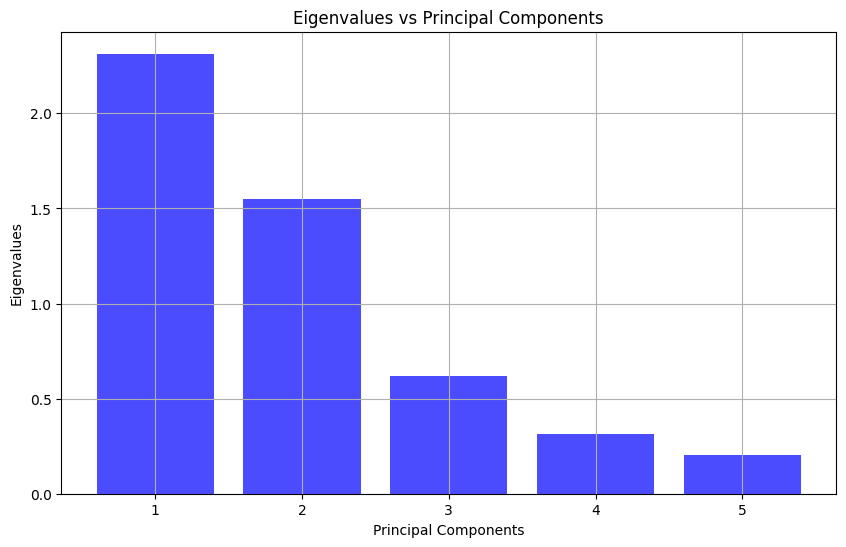

In [5]:
# Plot eigenvalues versus principal components
plt.figure(figsize=(10, 6))
plt.bar(range(1, 5 + 1), eigenvalues[:6], color='blue', alpha=0.7, align='center')
plt.title('Eigenvalues vs Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()


In [6]:
# Calculate the total variance covered by the principal components
total_variance = np.sum(eigenvalues)
explained_variance_individual= eigenvalues/total_variance

explained_variance = np.cumsum(eigenvalues) / total_variance

k=np.argmax(explained_variance >= 0.85) + 1

print(f'Value of K (number of principal components) : {k}')
top_k_eigenvectors = eigenvectors[:, :k]
top_k_eigenvalues = eigenvalues[:k]


Value of K (number of principal components) : 3


##Graph indicating that sequential variance increases

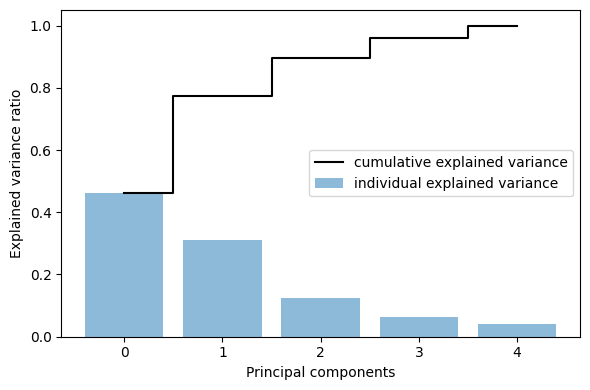

In [7]:
plt.figure(figsize=(6, 4))
plt.step(range(5), explained_variance, where='mid',color='black',label='cumulative explained variance')
plt.bar(range(5), explained_variance_individual, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

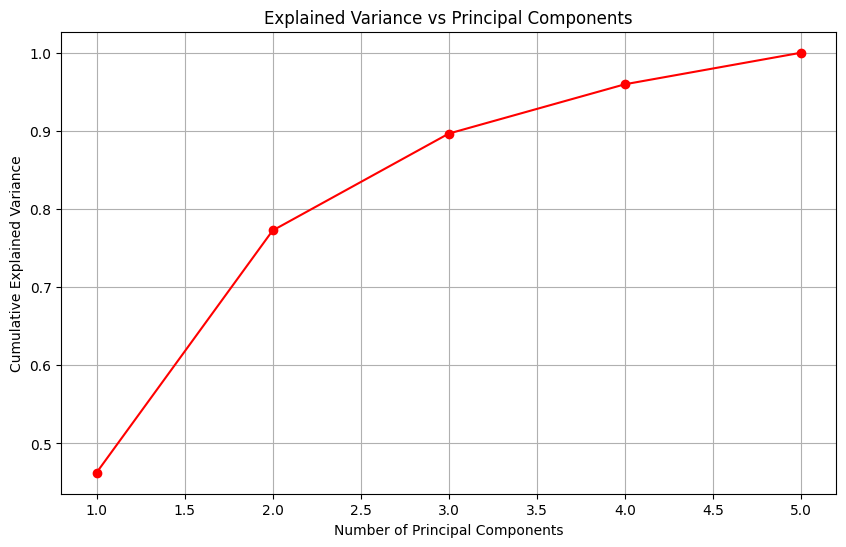

In [8]:
# Plot explained variance versus principal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='r')
plt.title('Explained Variance vs Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


##Plotting Pair-Plots for Numeric Data Columns

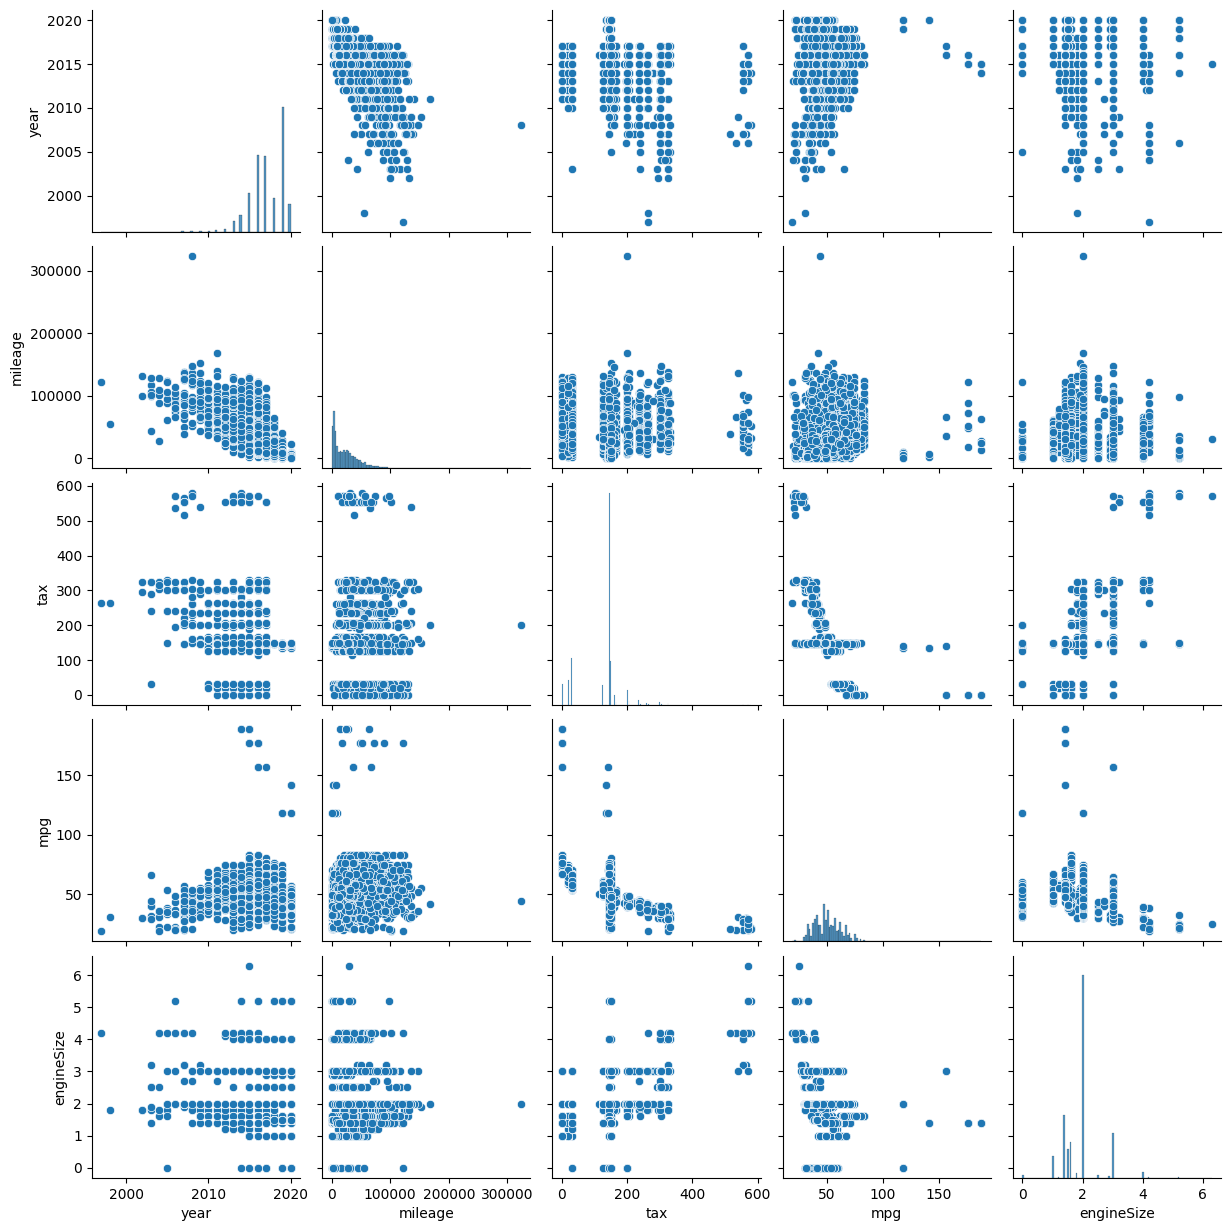

In [9]:
sns.pairplot(numeric_data)
plt.show()

##Projecting the principal components onto the Pair Plots

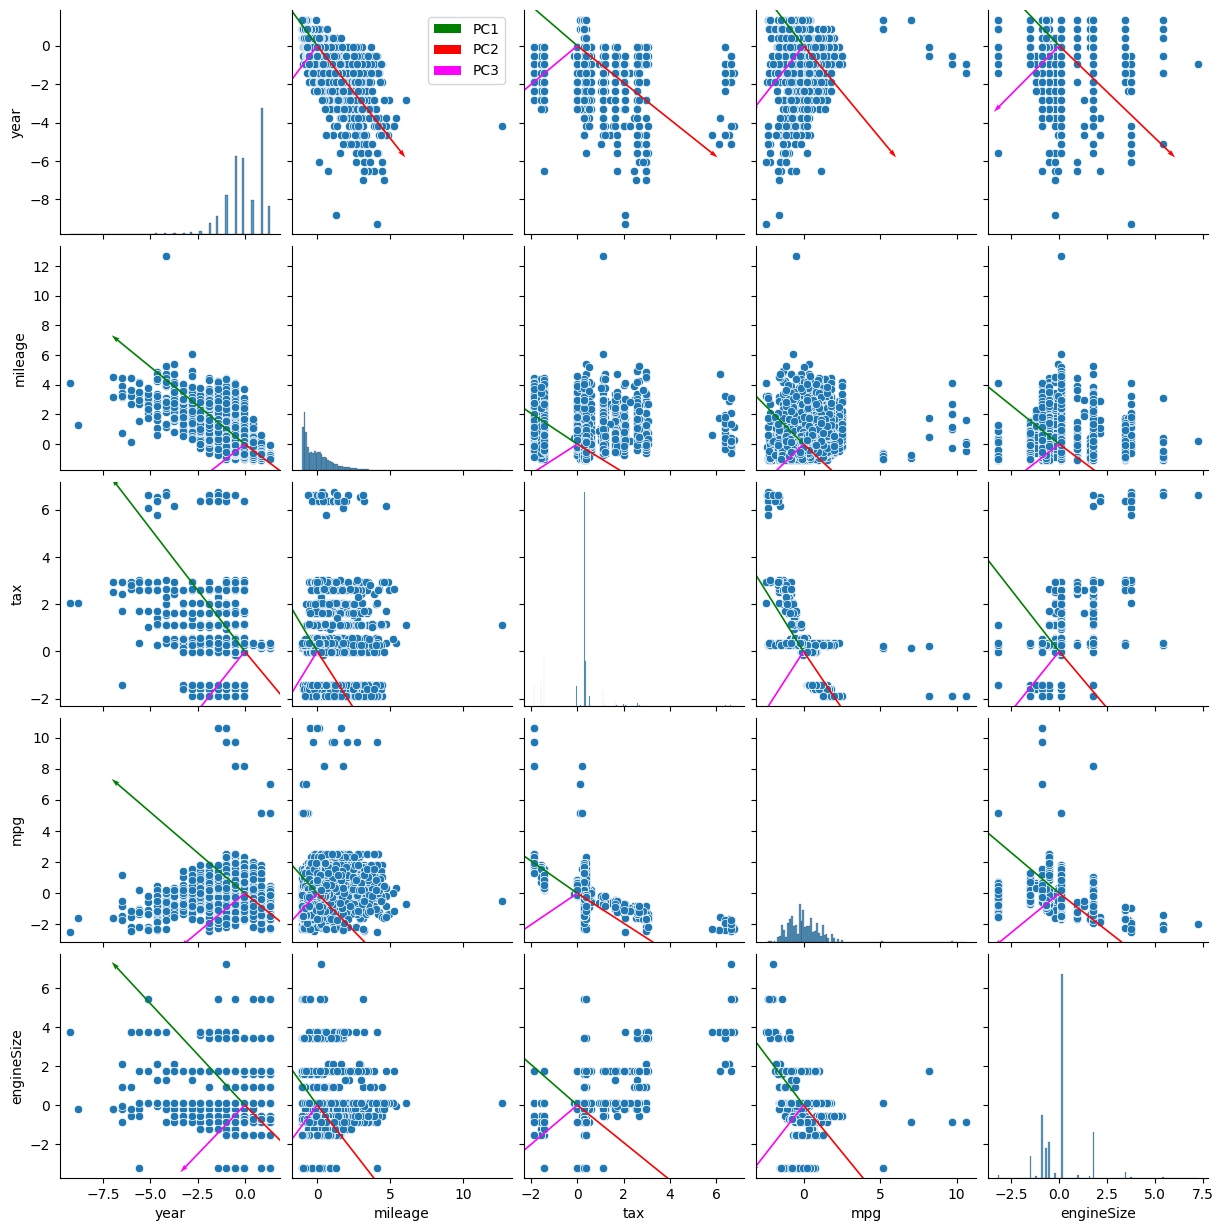

In [10]:
g = sns.pairplot(centered_data)
axes = g.axes
for i in range(centered_data.shape[1]):
    for j in range(centered_data.shape[1]):
        if i != j:
          for z in range(k):
            pc = top_k_eigenvectors[z]
            pc_scaled = np.sqrt(top_k_eigenvalues[z]) * pc
            if(z == 0):
              axes[i, j].quiver(0, 0, pc_scaled[0], pc_scaled[1], angles='xy', scale_units='xy', scale=0.1, color='green', label = 'PC1')
            if(z == 1):
              axes[i, j].quiver(0, 0, pc_scaled[0], pc_scaled[1], angles='xy', scale_units='xy', scale=0.1, color='red', label = 'PC2')
            if(z == 2):
              axes[i, j].quiver(0, 0, pc_scaled[0], pc_scaled[1], angles='xy', scale_units='xy', scale=0.1, color='magenta', label = 'PC3')

axes[0,1].legend()
plt.show()